LP Point found 
LP Point found 


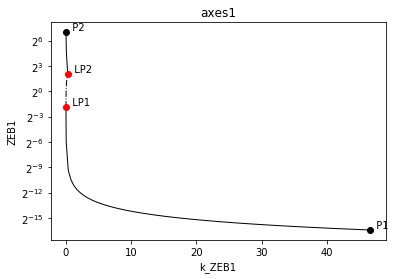

In [11]:
import PyDSTool as dst
import numpy as np
from matplotlib import pyplot as plt

# we must give a name
DSargs = dst.args(name='F')
# parameters_set_4582
DSargs.pars = {
'g_ZEB1' : 45.020691,
'g_miR200' : 28.038323,
'g_PDL1' : 21.809473,
'g_CDH1' : 73.377936,
'g_SLUG' : 56.03266,


'k_ZEB1' : 0.342756,
'k_miR200' : 1.000000,
'k_PDL1' : 0.395737,
'k_CDH1' : 0.799447,
'k_SLUG' : 0.648428,


'x_ZEB1_miR200' : 1.290665,
'x_miR200_ZEB1' : 9.808962,
'x_ZEB1_ZEB1' : 1.349563,
'x_miR200_PDL1' : 3.693163,
'x_PDL1_CDH1' : 13.343554,
'x_ZEB1_CDH1' : 0.106027,
'x_CDH1_ZEB1' : 2.852426,
'x_SLUG_miR200' : 3.553665,
'x_miR200_SLUG' : 7.757876,
'x_SLUG_ZEB1' : 6.74184,
'x_SLUG_SLUG' : 10.558772,
'x_SLUG_CDH1' : 15.931325,


'l_ZEB1_miR200' : 0.013152,
'l_miR200_ZEB1' : 0.161684,
'l_ZEB1_ZEB1' : 33.852364,
'l_miR200_PDL1' : 0.017462,
'l_PDL1_CDH1' : 0.091853,
'l_ZEB1_CDH1' : 0.018991,
'l_CDH1_ZEB1' : 0.174401,
'l_SLUG_miR200' : 0.024793,
'l_miR200_SLUG' : 0.052308,
'l_SLUG_ZEB1' : 72.555598,
'l_SLUG_SLUG' : 80.011943,
'l_SLUG_CDH1' : 0.011161,


'n_ZEB1_miR200' : 3,
'n_miR200_ZEB1' : 3,
'n_ZEB1_ZEB1' : 5,
'n_miR200_PDL1' : 6,
'n_PDL1_CDH1' : 2,
'n_ZEB1_CDH1' : 3,
'n_CDH1_ZEB1' : 4,
'n_SLUG_miR200' : 4,
'n_miR200_SLUG' : 1,
'n_SLUG_ZEB1' : 2,
'n_SLUG_SLUG' : 4,
'n_SLUG_CDH1' : 3}
    
##############################################
# auxiliary helper function(s) -- function name: ([func signature], definition)
DSargs.fnspecs  = {'heaviside': (['v','tauv'], 'heav(v-tauv)'),
                   'hill': (['X','X0','lamb','n'], '(X0**n)/(X0**n+X**n) + lamb*((X**n)/(X0**n+X**n))'),
                   'hilla': (['X','X0','lamb','n'], '(1/lamb)*((X0**n)/(X0**n+X**n)) + ((X**n)/(X0**n+X**n))') }
# rhs of the differential equation, including dummy variable w
DSargs.varspecs = {'ZEB1' : 'g_ZEB1*hill(miR200,x_miR200_ZEB1,l_miR200_ZEB1,n_miR200_ZEB1)*hilla(ZEB1,x_ZEB1_ZEB1,l_ZEB1_ZEB1,n_ZEB1_ZEB1)*hill(CDH1,x_CDH1_ZEB1,l_CDH1_ZEB1,n_CDH1_ZEB1)*hilla(SLUG,x_SLUG_ZEB1,l_SLUG_ZEB1,n_SLUG_ZEB1) - k_ZEB1*ZEB1',
                   'miR200' : 'g_miR200*hill(ZEB1,x_ZEB1_miR200,l_ZEB1_miR200,n_ZEB1_miR200)*hill(SLUG,x_SLUG_miR200,l_SLUG_miR200,n_SLUG_miR200) - k_miR200*miR200',
                   'PDL1' : 'g_PDL1*hill(miR200,x_miR200_PDL1,l_miR200_PDL1,n_miR200_PDL1) - k_PDL1*PDL1',
                   'CDH1' : 'g_CDH1*hill(PDL1,x_PDL1_CDH1,l_PDL1_CDH1,n_PDL1_CDH1)*hill(ZEB1,x_ZEB1_CDH1,l_ZEB1_CDH1,n_ZEB1_CDH1)*hill(SLUG,x_SLUG_CDH1,l_SLUG_CDH1,n_SLUG_CDH1) - k_CDH1*CDH1',
                   'SLUG' : 'g_SLUG*hill(miR200,x_miR200_SLUG,l_miR200_SLUG,n_miR200_SLUG)*hilla(SLUG,x_SLUG_SLUG,l_SLUG_SLUG,n_SLUG_SLUG) - k_SLUG*SLUG'}



# initial conditions
#DSargs.ics      = {'ZEB1': 200, 'miR200': 1,'PDL1': 200, 'CDH1': 1,'SLUG': 200}#Mphenotype
DSargs.ics      = {'ZEB1': 1, 'miR200': 100,'PDL1': 1, 'CDH1': 100,'SLUG': 1}#Ephenotype
DSargs.tdomain = [0,800]                         # set the range of integration.
ode  = dst.Generator.Vode_ODEsystem(DSargs)     # an instance of the 'Generator' class.
traj = ode.compute('polarization')              # integrate ODE
pts  = traj.sample(dt=0.1)                      # Data for plotting

# Prepare the system to start close to a steady state
ode.set(pars = {'k_ZEB1': 0.1} )       # Lower bound of the control parameter 'i'
ode.set(ics =  {'ZEB1': 128} )       # Close to one of the steady states present for i=-220

PC = dst.ContClass(ode)            # Set up continuation class

PCargs = dst.args(name='EQ1', type='EP-C')     # 'EP-C' stands for Equilibrium Point Curve. The branch will be labeled 'EQ1'.
PCargs.freepars     = ['k_ZEB1']                    # control parameter(s) (it should be among those specified in DSargs.pars)
PCargs.MaxNumPoints = 900                      # The following 3 parameters are set after trial-and-error
PCargs.MaxStepSize  = 0.45 #to extent
PCargs.MinStepSize  = 1e-7
PCargs.StepSize     = 0.01
PCargs.LocBifPoints = 'LP'                     # detect limit points / saddle-node bifurcations
PCargs.SaveEigen    = True   


PC.newCurve(PCargs)
PC['EQ1'].backward()
#PC['EQ1'].forward()
PC.display(['k_ZEB1','ZEB1'], stability=True, figure=3)        # stable and unstable branches as solid and dashed curves, resp.
plt.yscale("log",basey = 2)
#plt.title("with SA")
plt.show()

In [12]:
ZEB1 = list(PC['EQ1'].sol['ZEB1'])
miR200 = list(PC['EQ1'].sol['miR200'])
PDL1 = list(PC['EQ1'].sol['PDL1'])
CDH1 = list(PC['EQ1'].sol['CDH1'])
SLUG = list(PC['EQ1'].sol['SLUG'])
with open("PDL1_paraset4582_bistable.txt","w") as f:
#with open("PDL1_paraset4562_bistableforward_new.txt","w") as f:
    for i,j in enumerate(PC['EQ1'].sol['k_ZEB1']):
        f.write(str(j)+"\t"+str(ZEB1[i])+"\t"+str(miR200[i])+"\t"+str(PDL1[i])+"\t"+str(CDH1[i])+"\t"+str(SLUG[i])+"\n")
